In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import seaborn as sns

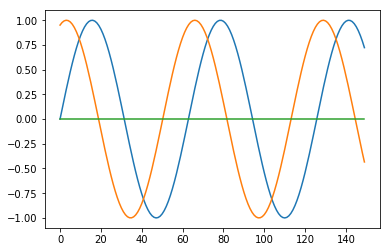

In [3]:
T = 150
t = .4

A = np.sin(np.array(range(T))/10)
B = np.sin((np.array(range(T))/10 + t*np.pi))
C = np.zeros((T))

plt.plot(A)
plt.plot(B)
plt.plot(C)
plt.show()

In [4]:
mse = lambda a,b: ((a-b)**2).mean()
print("A-B: ", mse(A,B))
print("A-C: ", mse(A,C))

A-B:  0.6639470476737607
A-C:  0.5150026855435942


In [5]:
δ = lambda a,b: (a - b)**2
first = lambda x: x[0]
second = lambda x: x[1]

def minVal(v1, v2, v3):
    if first(v1) <= min(first(v2), first(v3)):
        return v1, 0
    elif first(v2) <= first(v3):
        return v2, 1
    else:
        return v3, 2 

def calc_dtw(A, B):
    S = len(A)
    T = len(B)

    m = [[0 for j in range(T)] for i in range(S)]
    m[0][0] = (δ(A[0],B[0]), (-1,-1))
    for i in range(1,S):
        m[i][0] = (m[i-1][0][0] + δ(A[i], B[0]), (i-1,0))
    for j in range(1,T):
        m[0][j] = (m[0][j-1][0] + δ(A[0], B[j]), (0,j-1))

    for i in range(1,S):
        for j in range(1,T):
            minimum, index = minVal(m[i-1][j], m[i][j-1], m[i-1][j-1])
            indexes = [(i-1,j), (i,j-1), (i-1,j-1)]
            m[i][j] = (first(minimum)+δ(A[i], B[j]), indexes[index])
    return m

In [6]:
print("A-B: ", calc_dtw(A, B)[-1][-1][0])
print("A-C: ", calc_dtw(A, C)[-1][-1][0])

A-B:  9.673716299718746
A-C:  77.2504028315391


In [7]:
def backward(m):
    path = []
    path.append([len(m)-1, len(m[0])-1])
    while True:
        path.append(m[path[-1][0]][path[-1][1]][1])
        if path[-1]==(0,0):
            break
    path = np.array(path)
    return path

import matplotlib.gridspec as gridspec

def plot_path(path, A, B):
    gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,5],
                       height_ratios=[5,1]
                       )
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax4 = plt.subplot(gs[3])
    
    list_δ = [[t[0] for t in row] for row in m]
    list_δ = np.array(list_δ)
    ax2.pcolor(list_δ, cmap=plt.cm.Blues)
    ax2.plot(path[:,1], path[:,0], c="C3")
    
    ax1.plot(A, range(len(A)))
    ax1.invert_xaxis()
    ax4.plot(B, c="C1")
    plt.show()
    
    for line in path:
        plt.plot(line, [A[line[0]], B[line[1]]], linewidth=0.2, c="gray")
    plt.plot(A)
    plt.plot(B)
    plt.show()

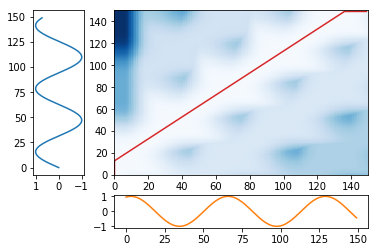

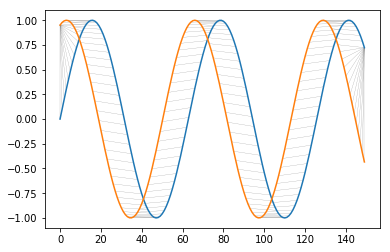

In [10]:
m = calc_dtw(A, B)
path = backward(m)
plot_path(path, A, B)

In [11]:
print(path)

[[149 149]
 [149 148]
 [149 147]
 [149 146]
 [149 145]
 [149 144]
 [149 143]
 [149 142]
 [149 141]
 [149 140]
 [149 139]
 [149 138]
 [149 137]
 [149 136]
 [148 135]
 [147 134]
 [146 133]
 [145 132]
 [144 131]
 [143 130]
 [142 129]
 [141 128]
 [140 127]
 [139 126]
 [138 125]
 [137 124]
 [136 123]
 [135 122]
 [134 121]
 [133 120]
 [132 119]
 [131 118]
 [130 117]
 [129 116]
 [128 115]
 [127 114]
 [126 113]
 [125 112]
 [124 111]
 [123 110]
 [122 109]
 [121 108]
 [120 107]
 [119 106]
 [118 105]
 [117 104]
 [116 103]
 [115 102]
 [114 101]
 [113 100]
 [112  99]
 [111  98]
 [110  97]
 [109  96]
 [108  95]
 [107  94]
 [106  93]
 [105  92]
 [104  91]
 [103  90]
 [102  89]
 [101  88]
 [100  87]
 [ 99  86]
 [ 98  85]
 [ 97  84]
 [ 96  83]
 [ 95  82]
 [ 94  81]
 [ 93  80]
 [ 92  79]
 [ 91  78]
 [ 90  77]
 [ 89  76]
 [ 88  75]
 [ 87  74]
 [ 86  73]
 [ 85  72]
 [ 84  71]
 [ 83  70]
 [ 82  69]
 [ 81  68]
 [ 80  67]
 [ 79  66]
 [ 78  65]
 [ 77  64]
 [ 76  63]
 [ 75  62]
 [ 74  61]
 [ 73  60]
 [ 72  59]